# Project: Wrangle and Analyze Data
## By Sherif Shawkat

In [1]:
#Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import requests
import json
import re
import datetime
import matplotlib.pyplot as plt
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer
%matplotlib inline

## Gathering data

In [2]:
#Read twitter archive csv

twitter_archive_enhanced_df = pd.read_csv('twitter-archive-enhanced.csv')

#Have an insight on the dataframe
twitter_archive_enhanced_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
#Download the image predictions file from the Udacity server
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)
    
image_predictions_df = pd.read_csv('image_predictions.tsv', sep='\t')

#Have an insight on the image predictions dataframe
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [ ]:
#Read twitter data using tweepy api (not used, I used the json file direclty)
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)
tweet_ids = twitter_archive_enhanced_df.tweet_id.values
len(tweet_ids)
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [4]:
#Read twitter json file 

tweets_data = []
with open('tweet-json.txt') as file:
    for line in file:
        try:
            tweet = json.loads(line)
            tweets_data.append(tweet)
        except:
            continue
df_api = pd.DataFrame(tweets_data, columns=list(tweets_data[0].keys()))

#Select the important columns only
tweets_df = df_api[['id', 'retweet_count', 'favorite_count']] 
tweets_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


Now we have 3 dataframes to process:

* twitter_archive_enhanced_df: contains each tweet, with the rating given.
* image_predictions_df: contains each tweet with the type of dog in the picture.
* tweets_df: contains each tweet with the count of retweets and favorites.

## Assessing data

### 1. Visual assessment

In [5]:
#twitter_archive_enhanced_df first 5 rows

twitter_archive_enhanced_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [6]:
#Get no. of rows and data type for each column

twitter_archive_enhanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

The twitter archive dataframe:

* **tweet_id**: the unique id for each tweet (primary key)
* **in_reply_to_status_id**: if current tweet is a reply to an original tweet, this field will contain the original tweet id
* **in_reply_to_user_id**: if current tweet is a reply to an original tweet, this field will contain the original tweet owner's user id
* **timestamp**: contains the time this tweet was posted.
* **source**: the source used to post this tweet.
* **text**: the text written in the tweet.
* **retweeted_status_id**: contains original tweet id, if current tweet is a re-tweet.
* **retweeted_status_user_id**: contains original tweet user id, if current tweet is a re-tweet.
* **retweeted_status_timestamp**: contains original tweet timestamp, if current tweet is a re-tweet.
* **expanded_urls**: contains the url of the tweet.
* **rating_numerator**: numerator of the rating given.
* **rating_denominator**: denemerator of the rating given.
* **name**: name of the dog.
* **doggo, floofer, pupper, puppo**: age category of the dog.

The dataframe has 2356 entries with 17 variables.

In [7]:
#twitter_archive_enhanced_df first 5 rows

image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [8]:
#Get no. of rows and data type for each column

image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


The image predictions dataframe:
    
* **tweet_id**: the unique id for each tweet (primary key)
* **jpg_url**: url of the image
* **img_num**: image number in the tweet
* **p1**: 1st prediction of the photo
* **p1_conf**: confidence level of 1st prediction
* **p1_dog**: 1st prediction is a type of a dog (True or False)
* **p2**: 2nd prediction of the photo
* **p2_conf**: confidence level of 2nd prediction
* **p2_dog**: 2nd prediction is a type of a dog (True or False)
* **p3**: 3rd prediction of the photo
* **p3_conf**: confidence level of 3rd prediction
* **p3_dog**: 3rd prediction is a type of a dog (True or False)

The dataframe has 2075 entries with 12 variables

In [9]:
#tweets_df first 5 rows

tweets_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [10]:
#Get no. of rows and data type for each column

tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


The tweets dataframe:

* **id**: the unique id for each tweet (primary key)
* **retweet_count**: count of retweets for this tweet
* **favorite_count**: count of favorties for this tweet

The dataframe has 2354 entries with 3 variables

### 2. Programmatic assessment

#### -Twitter archive dataframe

In [11]:
#Get no. of rows and data type for each column

twitter_archive_enhanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

**The twitter archive dataframe doesn't seem to have missing data, most columns have 2356 except (in_reply_to_status_id, in_reply_to_user_id) which is normal as not all tweets are replies, and also (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp) which is also normal as not all tweets are re-tweets, plus the column "expanded_urls" which is ok as we won't need this column in our analysis.**

**The 4 columns of dog age categories (doggo, floofer, pupper and puppo) can be merged into one categorical column "age_category"**

In [12]:
#Get basic statistics view on the dataframe

twitter_archive_enhanced_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


**Most of the columns values indicate just numbers not a value, except rating_numerator & rating_denominator, which have some extreme values**

In [13]:
#Check any duplicated tweet_id (primary key)

twitter_archive_enhanced_df.tweet_id.duplicated().sum()

0

**There are no duplicated rows in this dataframe**

In [14]:
#Check dog names that start with a lower case letter

twitter_archive_enhanced_df.loc[(twitter_archive_enhanced_df.name.str.islower())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,None,None,None,None
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Occasionally, we're sent fantastic stories. Th...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/828650029...,14,10,one,None,None,None,None
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024...,11,10,incredibly,None,None,None,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
682,788552643979468800,NaN,NaN,2016-10-19 01:29:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to mad pupper. You kn...,7.363926e+17,4.196984e+09,2016-05-28 03:04:00 +0000,"https://vine.co/v/iEggaEOiLO3,https://vine.co/...",13,10,mad,None,None,pupper,None


**All dog names that start with a lower case letter are invalid names**

In [15]:
#Find ratings having denominator != 10

twitter_archive_enhanced_df[twitter_archive_enhanced_df['rating_denominator']!=10]['rating_denominator'].value_counts()

50     3
11     3
20     2
80     2
90     1
40     1
130    1
2      1
70     1
7      1
110    1
170    1
120    1
15     1
16     1
150    1
0      1
Name: rating_denominator, dtype: int64

**There are some ratings with denominator != 10, they will be deleted**

**A new column "rating" will be created having the value of numerator/denominator, then columns "rating_numerator" and "rating_denominator" will be dropped**

In [16]:
#Get rating numerator that has decimal values, but in text not in rating_numerator

twitter_archive_enhanced_df[twitter_archive_enhanced_df['text'].str.contains('\d+\.\d+/\d+')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've been told there's a slight possibility he...,NaN,NaN,NaN,NaN,5,10,None,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,26,10,None,None,None,None,None


**Since there are some numerators that have decimal values, the numerator extracted was not correct. Therefore we will extract the ratings from the text and won't depend on the numerator & denominator columns already extracted**

In [17]:
#Get tweets that have no images

twitter_archive_enhanced_df[twitter_archive_enhanced_df['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


**Tweets with no images will be dropped**

In [18]:
#Get tweets that have names of dogs < 3 which is most probably not a correct name for a dog

twitter_archive_enhanced_df[twitter_archive_enhanced_df['name'].apply(len) < 3]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
393,825876512159186944,NaN,NaN,2017-01-30 01:21:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mo. No one will push him around in the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825876512...,11,10,Mo,None,None,None,None
446,819015337530290176,NaN,NaN,2017-01-11 02:57:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He was a very good ...,8.190048e+17,4.196984e+09,2017-01-11 02:15:36 +0000,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
449,819004803107983360,NaN,NaN,2017-01-11 02:15:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He was a very good First Doggo. 14...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
553,804026241225523202,NaN,NaN,2016-11-30 18:16:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's going to make me cry. 13/10 p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/804026241...,13,10,Bo,None,None,None,None
583,800188575492947969,NaN,NaN,2016-11-20 04:06:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He's a Benedoop Cum...,6.816941e+17,4.196984e+09,2015-12-29 04:31:49 +0000,https://twitter.com/dog_rates/status/681694085...,11,10,Bo,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
679,789137962068021249,NaN,NaN,2016-10-20 16:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's a West Congolese Bugaboop Snu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/789137962...,12,10,Bo,None,None,None,None
686,788070120937619456,NaN,NaN,2016-10-17 17:32:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo and Ty. Bo eats pape...,7.610045e+17,4.196984e+09,2016-08-04 01:03:17 +0000,https://twitter.com/dog_rates/status/761004547...,11,10,Bo,None,None,None,None
759,778396591732486144,NaN,NaN,2016-09-21 00:53:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is an East African Chalupa...,7.030419e+17,4.196984e+09,2016-02-26 02:20:37 +0000,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None


**Tweets with dog name invalid will be dropped**

In [19]:
#Check retweets

twitter_archive_enhanced_df[twitter_archive_enhanced_df['retweeted_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


**All retweets shall be removed, otherwie they will be counted more than once in our analysis**

#### - Image predictions dataframe

In [20]:
#Get no. of rows and data type for each column

image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


**The image predictions dataframe doesn't seem to have any missing data**

In [21]:
#Get basic statistics view on the dataframe

image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


**Values of this dataframe seem normal**

In [22]:
#Check any duplicated tweet_id (primary key)

image_predictions_df.tweet_id.duplicated().sum()

0

**There are no duplicated rows in this dataframe**

#### - Tweets dataframe

In [23]:
#Get no. of rows and data type for each column

tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


**The tweets dataframe doesn't seem to have any missing data**

In [24]:
#Get basic statistics view on the dataframe

tweets_df.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


**Values of this dataframe seem normal**

In [25]:
#Check any duplicated tweet_id (primary key)

tweets_df.id.duplicated().sum()

0

**There are no duplicated rows in this dataframe**

## Below is the summary of the Tidiness & Quality issues to be addressed:

### Tidines Issues (3):
* Merge all 3 dataframes (twitter_archive_enhanced_df, image_predictions_df and tweets_df) in 1 dataframe (combined_df) using the tweet_id key.
* Merge the 4 dog stages (doggo, floofer, pupper and puppo) to 1 column "dog_stage".
* Drop unnecessary columns (will be addressed in details after some quality issues are done).

### Quality Issues (9):
* Modify dog names having length < 2 to NaN.
* Remove tweets with rating denominator != 10.
* Remove tweets with no images
* Clean "source" column and remove its html tags.
* Remove retweets
* Remove tweets that has the 3 predictions as "Not dog".
* Adjust rating having decimal in numerator, extract values from the text itself
* Adjust dog type to all lower case letters
* Change format of some columns (timestamp, ..etc)

#### For simplicity, we will address all problems but not in the order given above (i.e: I may address some quality issues before some tidiness issues)

# Cleaning Data:

In [26]:
#Make copies of the 3 dataframes before working on them

twitter_archive_enhanced_df_copy = twitter_archive_enhanced_df.copy()
image_predictions_df_copy = image_predictions_df.copy()
tweets_df_copy = tweets_df.copy()

## Tidiness #1: Merge the 4 dog stages

**Define:** Merge all 4 age categories (doggo, floofer, pupper and puppo) to 1 column "dog_stage".

**Code:**

In [27]:
#Replace "None" to "NaN" in the 4 stages columns
twitter_archive_enhanced_df_copy.doggo.replace(to_replace=["None"], value=np.nan, inplace=True)
twitter_archive_enhanced_df_copy.floofer.replace(to_replace=["None"], value=np.nan, inplace=True)
twitter_archive_enhanced_df_copy.pupper.replace(to_replace=["None"], value=np.nan, inplace=True)
twitter_archive_enhanced_df_copy.puppo.replace(to_replace=["None"], value=np.nan, inplace=True)

#Concatenate each column to the other with a ',' separator
twitter_archive_enhanced_df_copy['dog_stage']=twitter_archive_enhanced_df_copy['doggo'].fillna('')+', '+twitter_archive_enhanced_df_copy['floofer'].fillna('')+', '+twitter_archive_enhanced_df_copy['pupper'].fillna('')+', '+twitter_archive_enhanced_df_copy['puppo'].fillna('')

#Remove extra unneeded ','
twitter_archive_enhanced_df_copy['dog_stage'] = twitter_archive_enhanced_df_copy['dog_stage'].str.replace(', , , p','p')
twitter_archive_enhanced_df_copy['dog_stage'] = twitter_archive_enhanced_df_copy['dog_stage'].str.replace(', , , ','None')
twitter_archive_enhanced_df_copy['dog_stage'] = twitter_archive_enhanced_df_copy['dog_stage'].str.replace(', ','')
twitter_archive_enhanced_df_copy['dog_stage'] = twitter_archive_enhanced_df_copy['dog_stage'].str.replace('doggoNone','doggo')
twitter_archive_enhanced_df_copy['dog_stage'] = twitter_archive_enhanced_df_copy['dog_stage'].str.replace('doggop','doggo, p')
twitter_archive_enhanced_df_copy['dog_stage'] = twitter_archive_enhanced_df_copy['dog_stage'].str.replace('doggof','doggo, f')


**Test:**

In [28]:
twitter_archive_enhanced_df_copy.head(3)

twitter_archive_enhanced_df_copy['dog_stage'].value_counts()

None              1976
pupper             245
doggo               83
puppo               29
doggo, pupper       12
floofer              9
doggo, puppo         1
doggo, floofer       1
Name: dog_stage, dtype: int64

## Quality #1: Extract rating from text

**Define:** Extract the rating from the text, instead of using the ready columns "rating_numerator" and "rating_denominator" due to some decimal numerators ruining the values extracted.

**Code:**

In [29]:
#Extract any string from the text containing x/y
ratings = twitter_archive_enhanced_df_copy.text.str.extract('(\d+(\.\d+)*\/\d+)')[0]

#Append this column to the dataframe
twitter_archive_enhanced_df_copy['rating']=ratings

#Split the rating using the delimiter "/"
rating_split = twitter_archive_enhanced_df_copy["rating"].str.split("/", n = 1, expand = True) 

#Update the numerator and denominator in the dataframe using the correct new values
twitter_archive_enhanced_df_copy['rating_numerator'], twitter_archive_enhanced_df_copy['rating_denominator'] = rating_split[0], rating_split[1]

#Change column type to float instead of string
twitter_archive_enhanced_df_copy['rating_numerator'] = twitter_archive_enhanced_df_copy['rating_numerator'].astype(float)
twitter_archive_enhanced_df_copy['rating_denominator'] = twitter_archive_enhanced_df_copy['rating_denominator'].astype(float)

#Update the rating column to contain a decimal value instead of a fraction
twitter_archive_enhanced_df_copy['rating'] = twitter_archive_enhanced_df_copy['rating_numerator'] / twitter_archive_enhanced_df_copy['rating_denominator']

**Test:**

In [30]:
#Fetch first 3 rows having decimal rating in the text
twitter_archive_enhanced_df_copy[twitter_archive_enhanced_df_copy['text'].str.contains('\d+\.\d+/\d+')].head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage,rating
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,13.50,10.0,Bella,NaN,NaN,NaN,NaN,None,1.350
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,9.75,10.0,Logan,NaN,NaN,NaN,NaN,None,0.975
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,9.75,10.0,Logan,NaN,NaN,NaN,NaN,None,0.975


## Quality #2: Clean the source column

**Define:** Extract the source of the tweet from the "source" column, and remove any unnecessary html tags.

**Code:**

In [31]:
#Define the tags format, and define a function to remove tags from the input text
tags = re.compile(r'<[^>]+>')

def remove_tags(text):
    return tags.sub('', text)

#Apply the defined function to the "source" column
twitter_archive_enhanced_df_copy['source'] = twitter_archive_enhanced_df_copy['source'].apply(remove_tags)

**Test:**

In [32]:
#Get count for each value of "source" column
twitter_archive_enhanced_df_copy['source'].value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

## Quality #3: Remove retweets

**Define:** Delete any rows that are re-tweets as they are not new tweets.

**Code:**

In [33]:
#Just select the rows that have empty "retweeted_status_id" values
twitter_archive_enhanced_df_copy = twitter_archive_enhanced_df_copy[twitter_archive_enhanced_df_copy['retweeted_status_id'].isnull()]

**Test:**

In [34]:
#Get rows that have non empty "retweeted_status_id" values
twitter_archive_enhanced_df_copy[twitter_archive_enhanced_df_copy['retweeted_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage,rating


## Quality #4: Remove tweets with no images

**Define:** Delete any tweets that has no dog images.

**Code:**

In [35]:
#Select only rows having values in "expanded_urls" column
twitter_archive_enhanced_df_copy = twitter_archive_enhanced_df_copy[twitter_archive_enhanced_df_copy['expanded_urls'].notnull()]

**Test:**

In [36]:
#Get rows that have empty "expanded_urls"
twitter_archive_enhanced_df_copy[twitter_archive_enhanced_df_copy['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage,rating


## Quality #5: Modify dog names having length < 2 to NaN

**Define:** Modify dog names having length < 2 to NaN, as most probably the names extracted are not correct.

**Code:**

In [37]:
#Replace names having length < 2 with 'None'
twitter_archive_enhanced_df_copy['name'] = np.where(twitter_archive_enhanced_df_copy['name'].str.len() < 2, 'None', twitter_archive_enhanced_df_copy['name'])

**Test:**

In [38]:
#Check there are no tweets with name length < 2
twitter_archive_enhanced_df_copy['name'].value_counts()
twitter_archive_enhanced_df_copy[twitter_archive_enhanced_df_copy['name'].str.len() < 2]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage,rating


## Quality #6: Remove tweets with rating denominator != 10

**Define:** Delete any tweets that has a rating denominator != 10.

**Code:**

In [39]:
#Select only tweets with rating denominator = 10
twitter_archive_enhanced_df_copy = twitter_archive_enhanced_df_copy[twitter_archive_enhanced_df_copy['rating_denominator'] == 10]

**Test:**

In [40]:
#Check there are no tweets with rating denominator != 10
twitter_archive_enhanced_df_copy[twitter_archive_enhanced_df_copy['rating_denominator'] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage,rating


## Quality #7: Adjust dog type name to lower case letters

**Define:** Adjust dog type name to lower case letters to avoid duplicated types due to lower/upper case characters.

**Code:**

In [41]:
#Convert p1, p2 and p3 columns to lower case
image_predictions_df_copy['p1'] = image_predictions_df_copy['p1'].str.lower()
image_predictions_df_copy['p2'] = image_predictions_df_copy['p2'].str.lower()
image_predictions_df_copy['p3'] = image_predictions_df_copy['p3'].str.lower()

**Test:**

In [42]:
image_predictions_df_copy['p1'].value_counts()

golden_retriever             150
labrador_retriever           100
pembroke                      89
chihuahua                     83
pug                           57
chow                          44
samoyed                       43
toy_poodle                    39
pomeranian                    38
cocker_spaniel                30
malamute                      30
french_bulldog                26
miniature_pinscher            23
chesapeake_bay_retriever      23
seat_belt                     22
german_shepherd               20
staffordshire_bullterrier     20
siberian_husky                20
web_site                      19
cardigan                      19
shetland_sheepdog             18
eskimo_dog                    18
maltese_dog                   18
teddy                         18
beagle                        18
shih-tzu                      17
rottweiler                    17
lakeland_terrier              17
italian_greyhound             16
kuvasz                        16
          

## Tidiness #2: Merge all 3 dataframes

**Define:** Merge all 3 dataframes into 1 dataframe "combined_df"

**Code:**

In [43]:
# Join twitter_archive_enhanced_df_copy & image_predictions_df_copy
combined_df = pd.merge(twitter_archive_enhanced_df_copy, image_predictions_df_copy, left_on = 'tweet_id', right_on = 'tweet_id', how = 'inner')

# Join the combined dataframe & tweets_df_copy
combined_df = pd.merge(combined_df, tweets_df_copy, left_on = 'tweet_id', right_on = 'id', how = 'inner')

**Test:**

In [44]:
combined_df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,False,bagel,0.085851,False,banana,0.076110,False,892420643555336193,8853,39467
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,True,pekinese,0.090647,True,papillon,0.068957,True,892177421306343426,6514,33819


## Quality #8: Remove tweets that has the 3 predictions as "Not dog"

**Define:** Remove tweets that have the 3 predictions "p1_dog", "p2_dog" and "p3_dog" as False

**Code:**

In [45]:
#Select only tweets that have at least one prediction of dog as True
combined_df = combined_df[(combined_df['p1_dog'] == True) | (combined_df['p2_dog'] == True) | (combined_df['p3_dog'] == True)]

**Test:**

In [46]:
#Check no tweets have all 3 predicitons as not dog
combined_df[(combined_df['p1_dog'] == False) & (combined_df['p2_dog'] == False) & (combined_df['p3_dog'] == False)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,retweet_count,favorite_count


## Tidiness #3: Delete unnecessary columns

**Define:** Delete any unnecessary columns that we won't need in our analysis.

**Code:**

In [47]:
combined_df.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id',
                 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator',
                 'doggo', 'floofer', 'pupper', 'puppo', 'jpg_url', 'id'], axis=1, inplace = True)

**Test:**

In [48]:
combined_df.head(2)

,tweet_id,timestamp,source,text,name,dog_stage,rating,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,Tilly,None,1.3,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,Archie,None,1.2,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461


## Quality #9: Adjust some column types

**Define:**
Change column types for the combined dataframe

* tweet_id: int --> str
* timestamp: object --> timestamp
* source: object --> category
* age_type: object --> category

**Code:**

In [49]:
#Convert columns types mentioned above
combined_df['tweet_id'] = combined_df['tweet_id'].astype(str)
combined_df['timestamp'] = pd.to_datetime(combined_df['timestamp'])
combined_df['source'] = combined_df['source'].astype('category')
combined_df['dog_stage'] = combined_df['dog_stage'].astype('category')

**Test:**

In [50]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1669 entries, 1 to 1975
Data columns (total 19 columns):
tweet_id          1669 non-null object
timestamp         1669 non-null datetime64[ns, UTC]
source            1669 non-null category
text              1669 non-null object
name              1669 non-null object
dog_stage         1669 non-null category
rating            1669 non-null float64
img_num           1669 non-null int64
p1                1669 non-null object
p1_conf           1669 non-null float64
p1_dog            1669 non-null bool
p2                1669 non-null object
p2_conf           1669 non-null float64
p2_dog            1669 non-null bool
p3                1669 non-null object
p3_conf           1669 non-null float64
p3_dog            1669 non-null bool
retweet_count     1669 non-null int64
favorite_count    1669 non-null int64
dtypes: bool(3), category(2), datetime64[ns, UTC](1), float64(4), int64(3), object(6)
memory usage: 204.2+ KB


# Store the new clean dataframe

In [51]:
#Save the cleaned dataframe to a csv file
combined_df.to_csv('twitter_archive_master.csv', index=False)

# Analyze & Visualize data

## Insight #1: Favorite dog stage

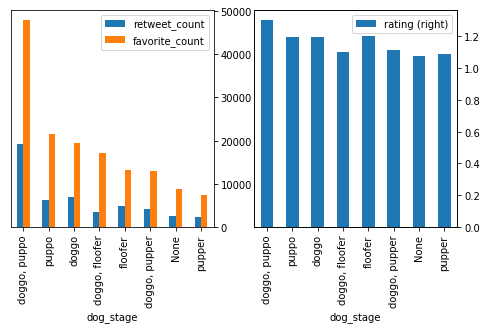

In [52]:
#Group by age_type, then take the average of rating, retweets and favorites
dog_stats = combined_df.groupby(['dog_stage'])['rating','retweet_count','favorite_count'].mean().sort_values('favorite_count',  ascending=False).reset_index()

#Bar plot the 3 variables
fig, (ax, ax2) = plt.subplots(ncols=2, sharey=True)
ax.yaxis.tick_right()
dog_stats.plot(x = 'dog_stage', y = 'rating', secondary_y = True, kind = "bar", ax=ax2 , figsize=(8, 4)) 
dog_stats.plot(x="dog_stage", y=["retweet_count", "favorite_count"], kind="bar", ax=ax);


**Based on rating, retweets and favorite, "doggo + puppo" is the most liked dog stage, while the least liked dog stage is "pupper"**

## Insight #2: Most used source of tweets

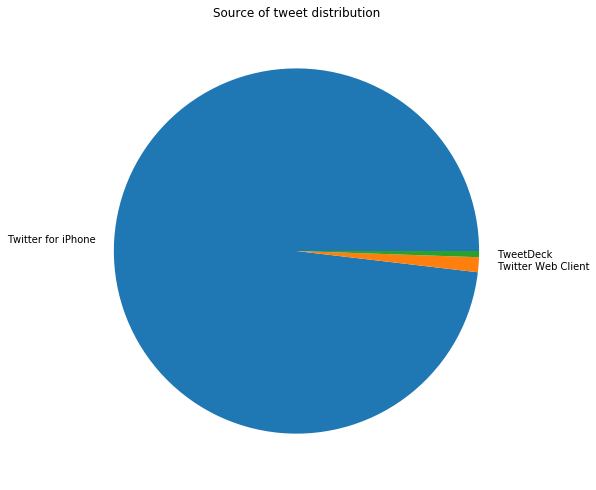

In [53]:
#Plot the source column as pie chart, adjust plot size
plt.figure(figsize=(18,16))
ax1 = plt.subplot(121, aspect='equal')
combined_df.source.value_counts().plot(kind='pie', label='', title='Source of tweet distribution');

**Based on the above pie chart, most of the dog tweets came from iPhone**

## Insight #3: Most used names

In [54]:
#Get the top 5 most common used names for dogs
combined_df['name'].value_counts().head(5)

None       453
Lucy        10
Charlie     10
Cooper      10
Tucker       9
Name: name, dtype: int64

**The most used dog names are Cooper, Lucy and Charlie**

## Insight #4: Most common dog type

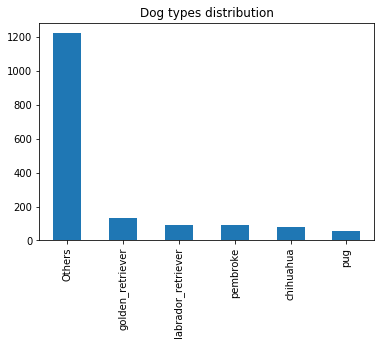

In [55]:
#Get the top 5 most common dog types
combined_df['p1'].value_counts().head(5)

#Get all dog type column
dog_types = combined_df['p1']

#List of top 5 dog types
list_top_types = ['golden_retriever', 'labrador_retriever', 'pembroke', 'chihuahua', 'pug']

#List of all dog types other than the top 5
non_common_types = list(set(dog_types)-set(list_top_types))

#Replace non common types with "Others"
dog_types.replace(non_common_types,"Others", inplace = True)

#Bar plot the dog types
dog_types.value_counts().plot(kind='bar', label='', title='Dog types distribution');

**Most common dog types are: golden_retriever, labrador_retriever, pembroke, chihuahua and pug**

## Insight #5: Most favorite/retweeted tweet

In [73]:
combined_df.head(2)
combined_df.sort_values(['retweet_count', 'favorite_count'], ascending=[False, False]).head(1)

,tweet_id,timestamp,source,text,name,dog_stage,rating,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
772,744234799360020481,2016-06-18 18:26:18+00:00,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,None,doggo,1.3,1,labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True,79515,131075


![title](most_favorite_tweet.jpg)

**The most favorite/retweeted tweet is a labrador_retreiver doggo trying to stand up in the pool, it has over 12.8M views on twitter at the moment**